<a href="https://colab.research.google.com/github/rizkyirw/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Associate Data Scientist

Nama Asesi: Isro' Rizky Wibowo

Nama Asesor: Farrikh Alzami

## Latar Belakang Masalah


Disini, **Class (num) merupakan variable dependent nya (label yang dicari)**.

## Tujuan Ujian Sertifikasi
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- Mengidentifikasi variabel kunci yang mempengaruhi penyakit jantung
- Memprediksi penyakit jantung

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang kesehatan tersebut.

## Terkait Dataset
- Sumber data: https://archive.ics.uci.edu/dataset/45/heart+disease
- Jumlah Sampel Data: 303 records dengan 13 atributes



**Fitur target**:

Class: num


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### setting variabel

In [1]:
ukuran_test = 0.3

## Load Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #mencari parameter terbaik

from sklearn.preprocessing import StandardScaler #normalisasi data

from sklearn.metrics import accuracy_score #performa ML nya
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None) #mengeluarkan seluruh fitur

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/0_si_2023')

Mounted at /content/drive


**silakan ubah dataset**

In [5]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BK/0_si_2023/processed.cleveland.data', header=None)

In [ ]:
# dataset = pd.read_csv('https://xxx')

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### memasukkan nama fitur kedalam dataset

**ubah nama kolom dataset**

In [7]:
dataset.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

### cek deskripsi data

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [11]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

In [13]:
dataset['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

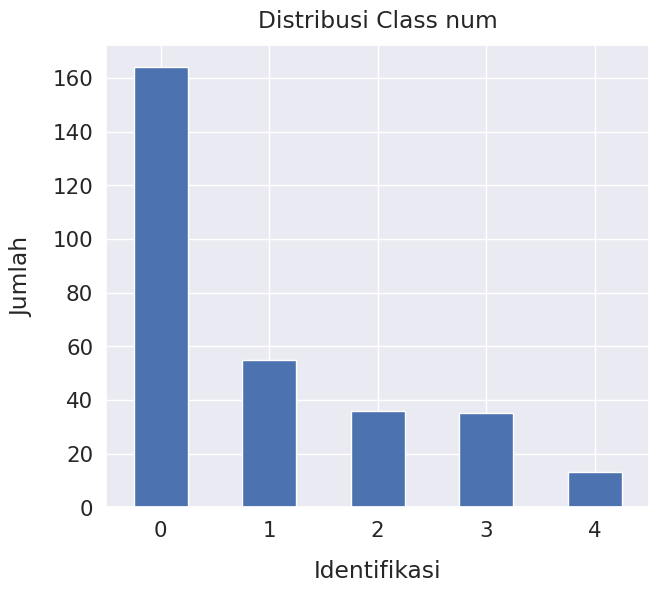

In [14]:
sns.set(font_scale=1.4)
dataset['num'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Class num", y=1.02);

## Cek Distribusi age

In [15]:
print(dataset['age'].value_counts())

58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
64.0    10
41.0    10
67.0     9
63.0     9
42.0     8
43.0     8
45.0     8
53.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
48.0     7
46.0     7
47.0     5
49.0     5
70.0     4
68.0     4
35.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
38.0     2
29.0     1
77.0     1
74.0     1
76.0     1
Name: age, dtype: int64


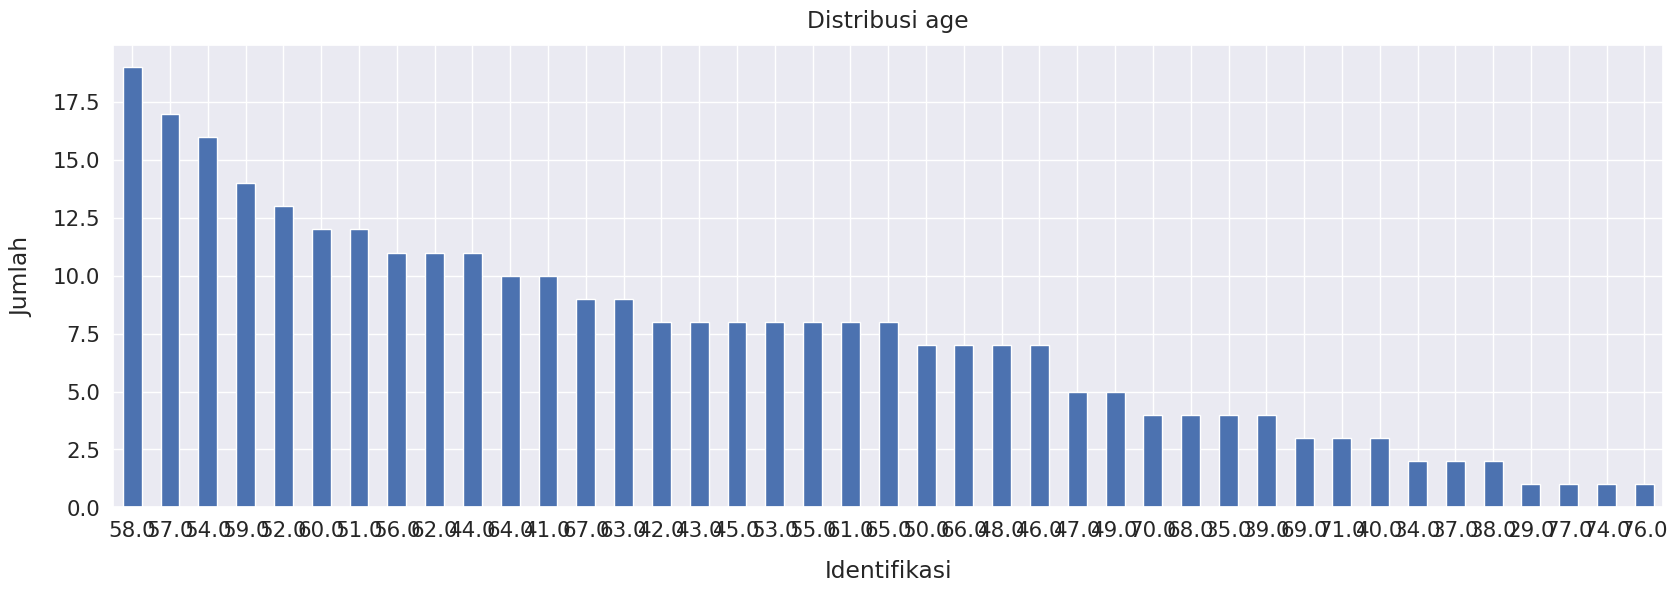

In [16]:
sns.set(font_scale=1.4)
dataset['age'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi age", y=1.02);

## Cek Distribusi sex

In [17]:
print(dataset['sex'].value_counts())

1.0    206
0.0     97
Name: sex, dtype: int64


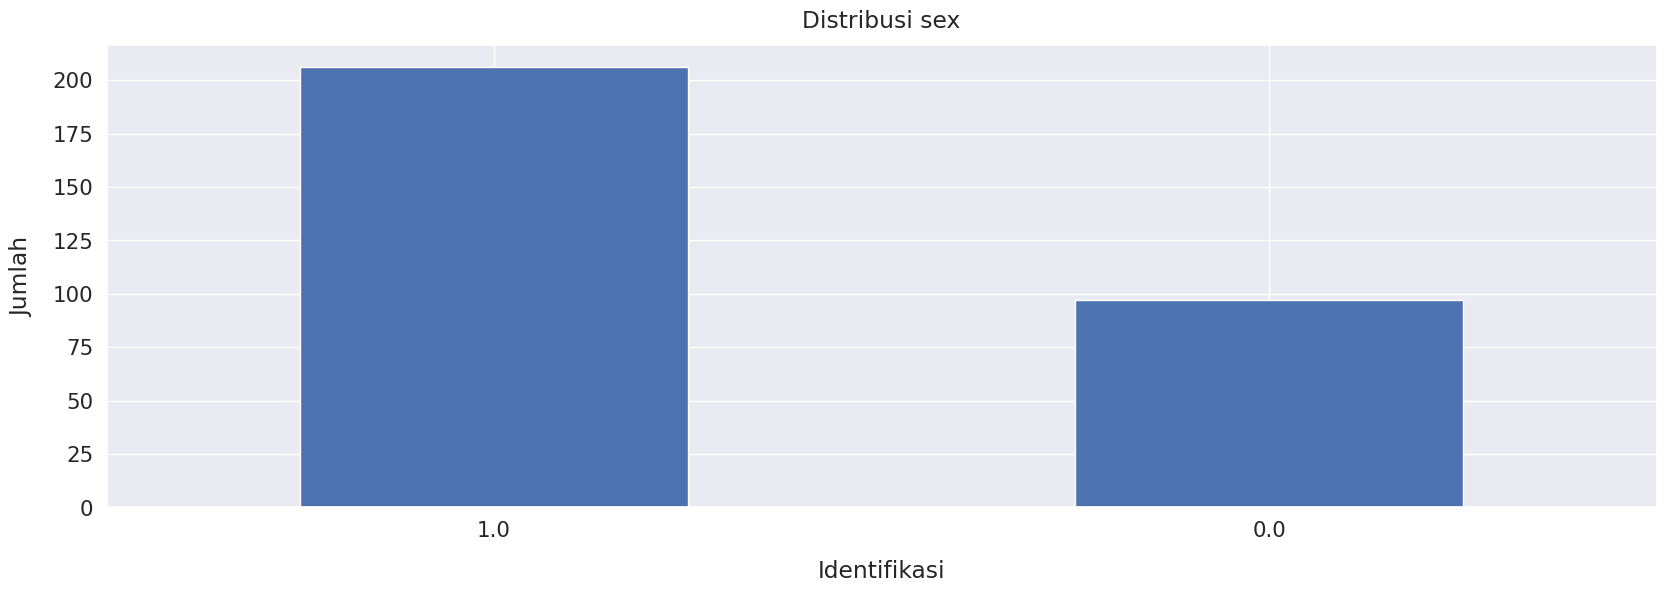

In [18]:
sns.set(font_scale=1.4)
dataset['sex'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi sex", y=1.02);

## Cek Distribusi cp

In [19]:
print(dataset['cp'].value_counts())

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64


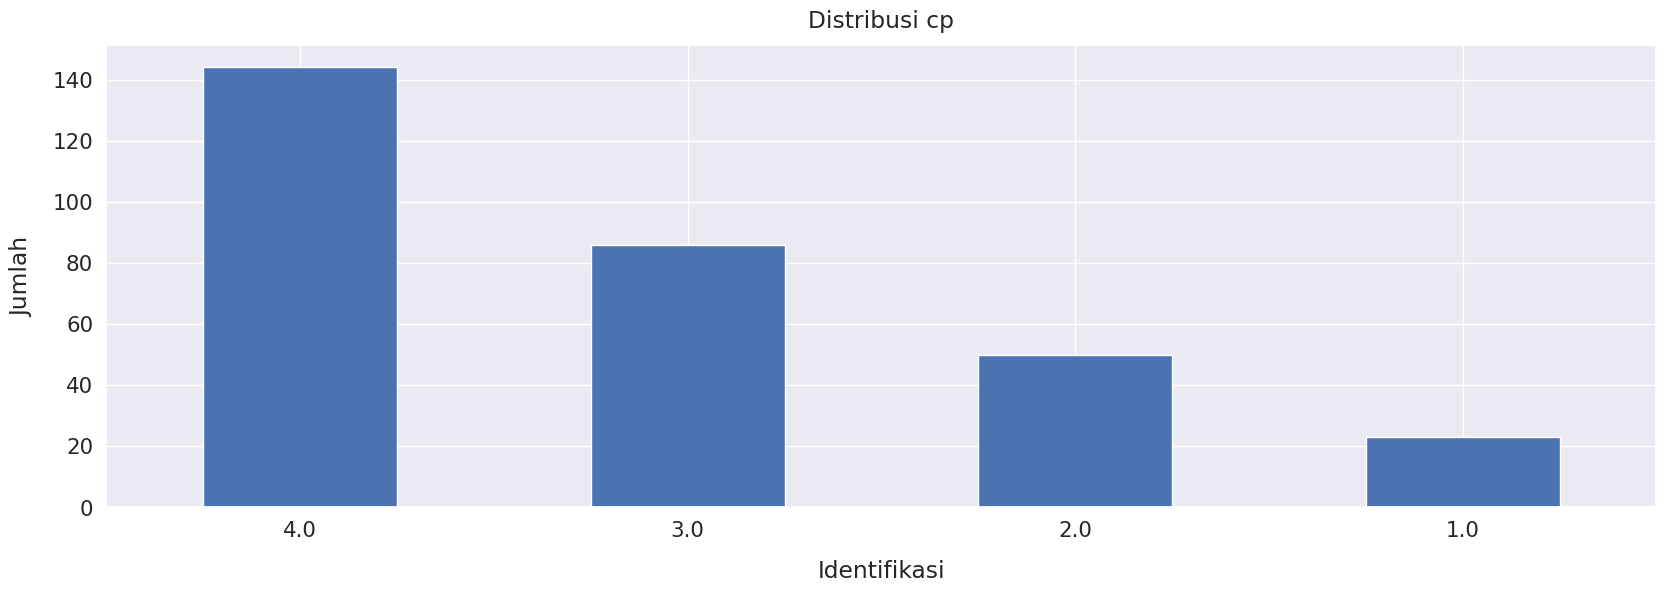

In [20]:
sns.set(font_scale=1.4)
dataset['cp'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi cp", y=1.02);

## Cek Distribusi trestbps

In [21]:
print(dataset['trestbps'].value_counts())

120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
160.0    11
125.0    11
112.0     9
132.0     8
118.0     7
124.0     6
108.0     6
135.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0     2
94.0      2
165.0     1
123.0     1
114.0     1
154.0     1
156.0     1
106.0     1
155.0     1
172.0     1
200.0     1
101.0     1
129.0     1
192.0     1
158.0     1
104.0     1
174.0     1
117.0     1
164.0     1
Name: trestbps, dtype: int64


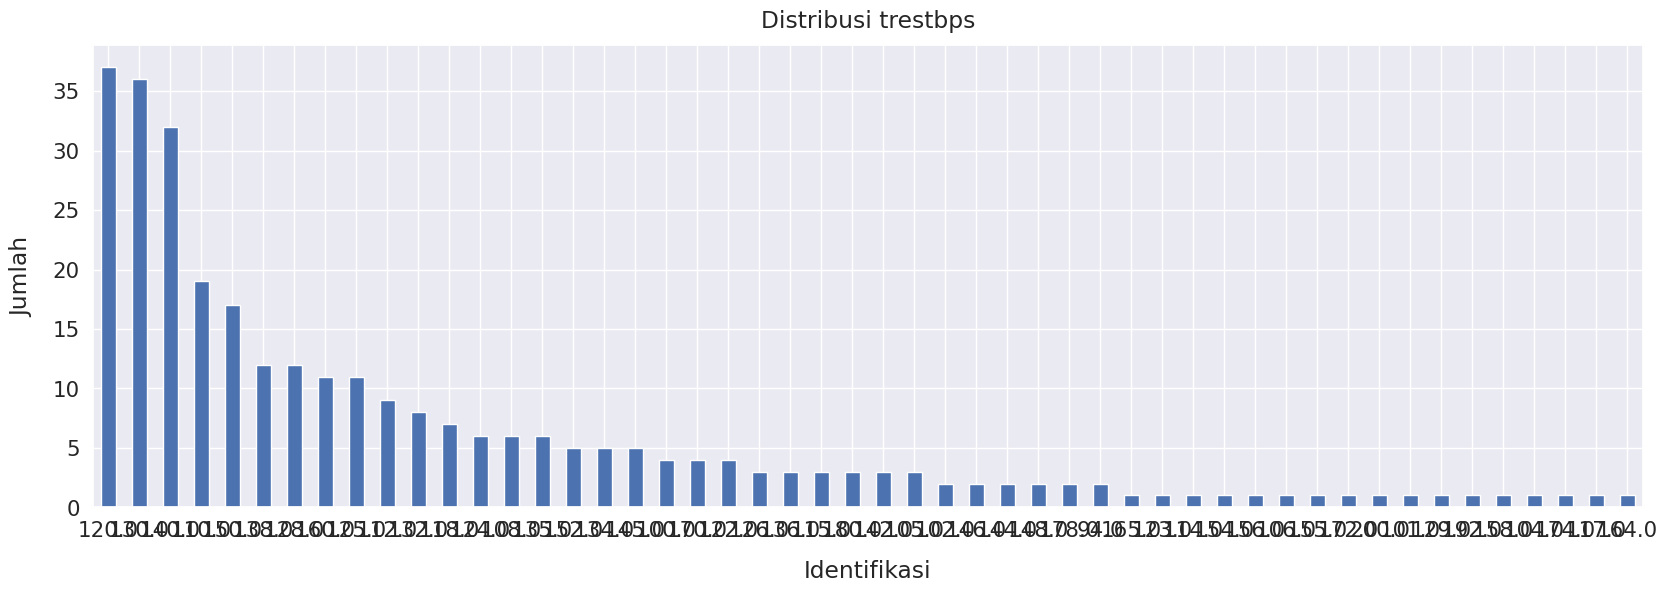

In [22]:
sns.set(font_scale=1.4)
dataset['trestbps'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi trestbps", y=1.02);

## Cek Distribusi chol

In [23]:
print(dataset['chol'].value_counts())

204.0    6
197.0    6
234.0    6
269.0    5
212.0    5
        ..
340.0    1
160.0    1
394.0    1
184.0    1
131.0    1
Name: chol, Length: 152, dtype: int64


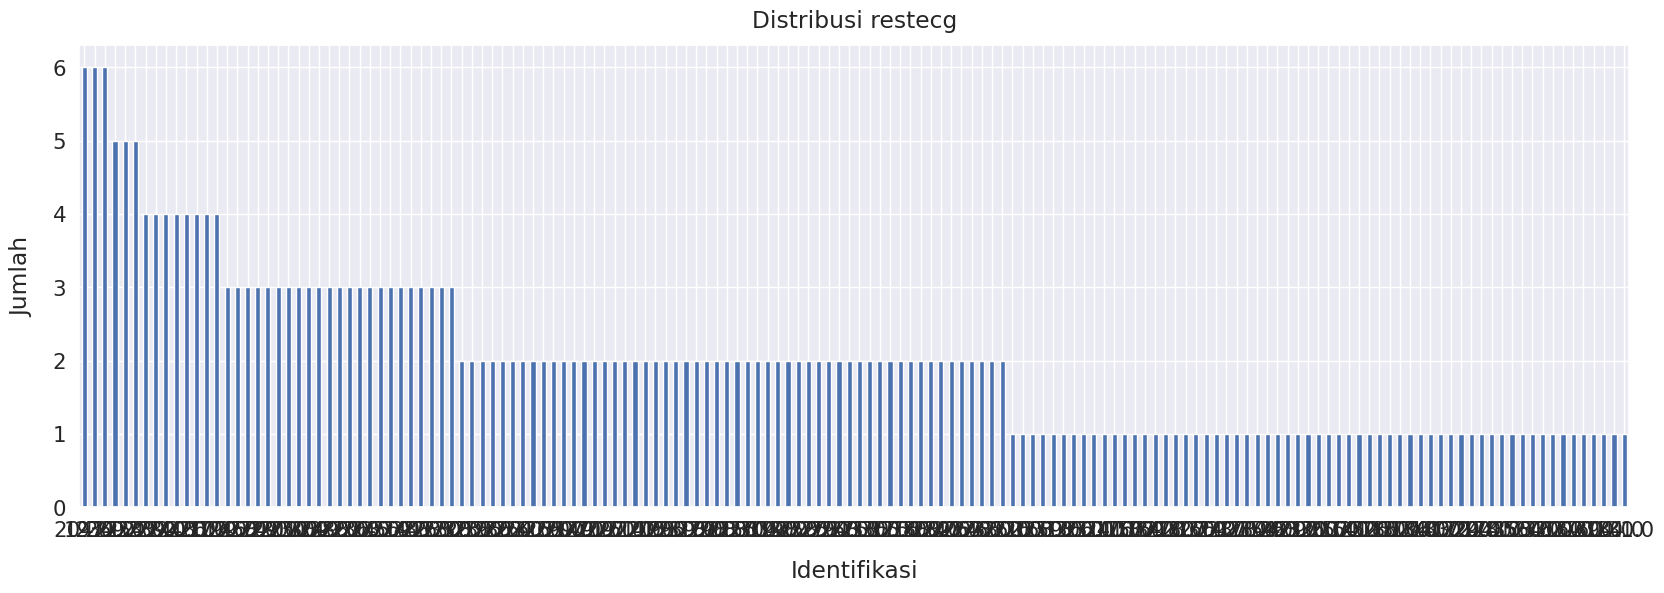

In [24]:
sns.set(font_scale=1.4)
dataset['chol'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi restecg", y=1.02);

## Cek Distribusi fbs

In [25]:
print(dataset['fbs'].value_counts())

0.0    258
1.0     45
Name: fbs, dtype: int64


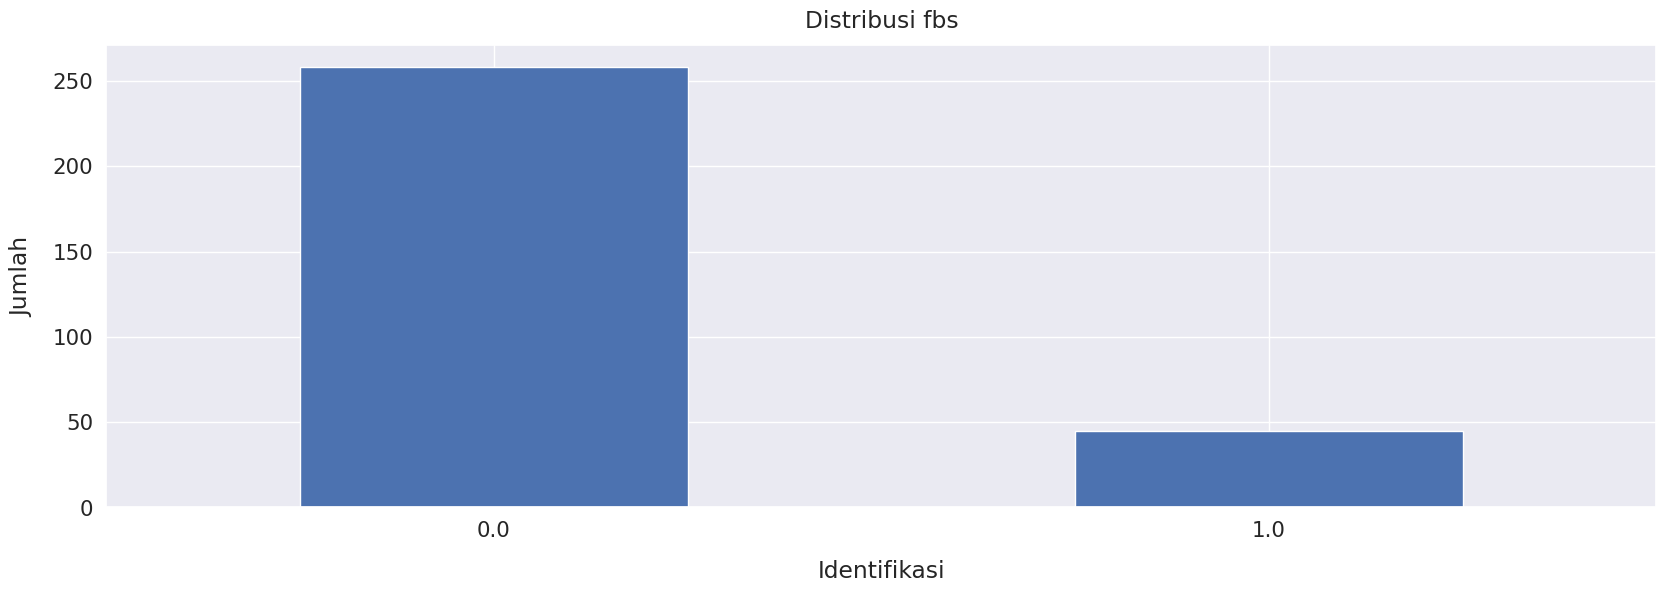

In [26]:
sns.set(font_scale=1.4)
dataset['fbs'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi fbs", y=1.02);

## Cek Distribusi restecg

In [27]:
print(dataset['restecg'].value_counts())

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64


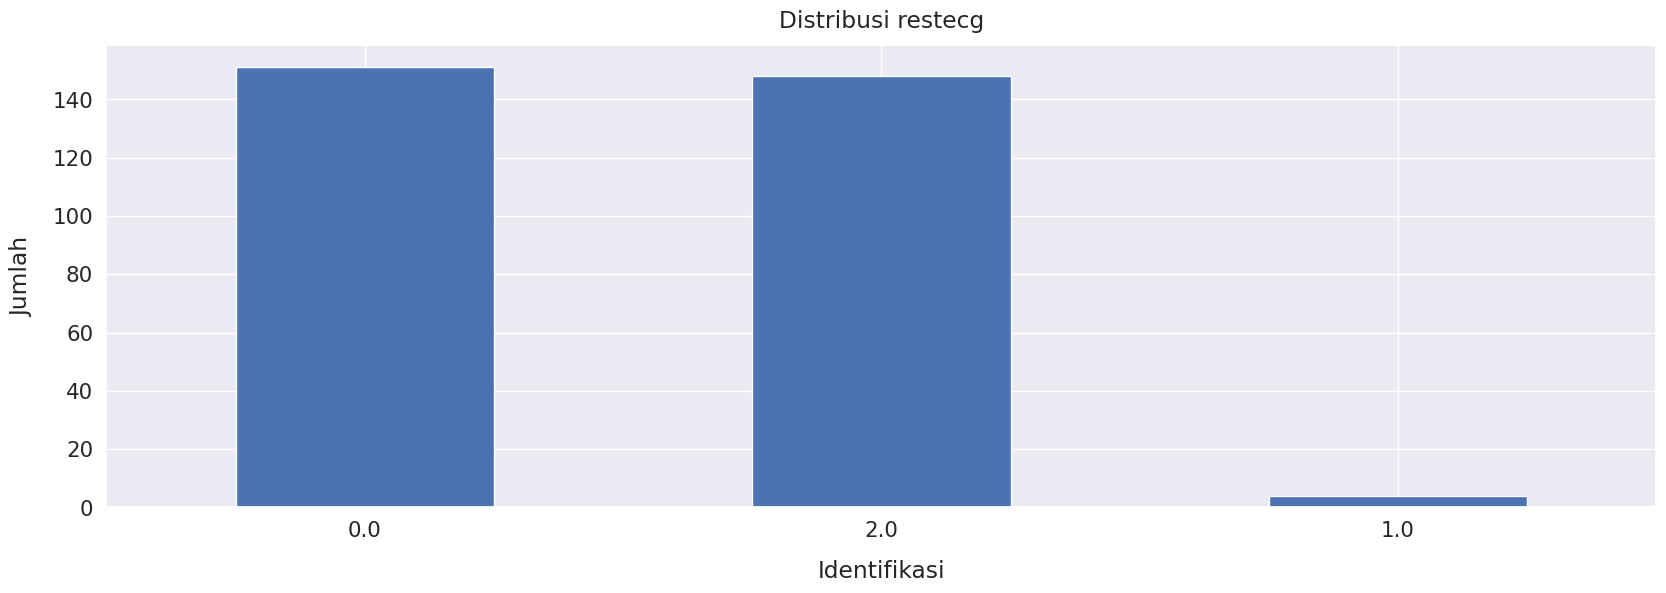

In [28]:
sns.set(font_scale=1.4)
dataset['restecg'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi restecg", y=1.02);

## Cek Distribusi thalach

In [29]:
print(dataset['thalach'].value_counts())

162.0    11
160.0     9
163.0     9
152.0     8
150.0     7
         ..
177.0     1
127.0     1
97.0      1
190.0     1
90.0      1
Name: thalach, Length: 91, dtype: int64


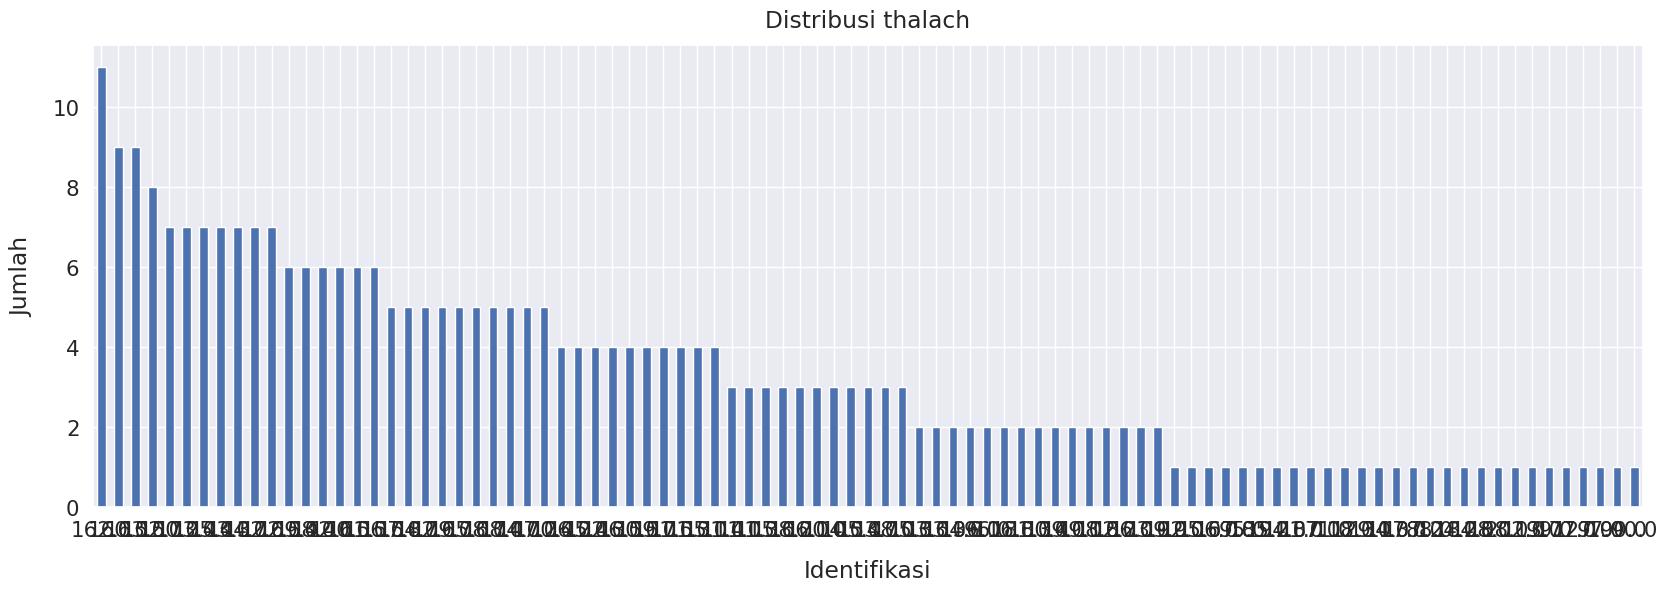

In [30]:
sns.set(font_scale=1.4)
dataset['thalach'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi thalach", y=1.02);

## Cek Distribusi exang

In [31]:
print(dataset['exang'].value_counts())

0.0    204
1.0     99
Name: exang, dtype: int64


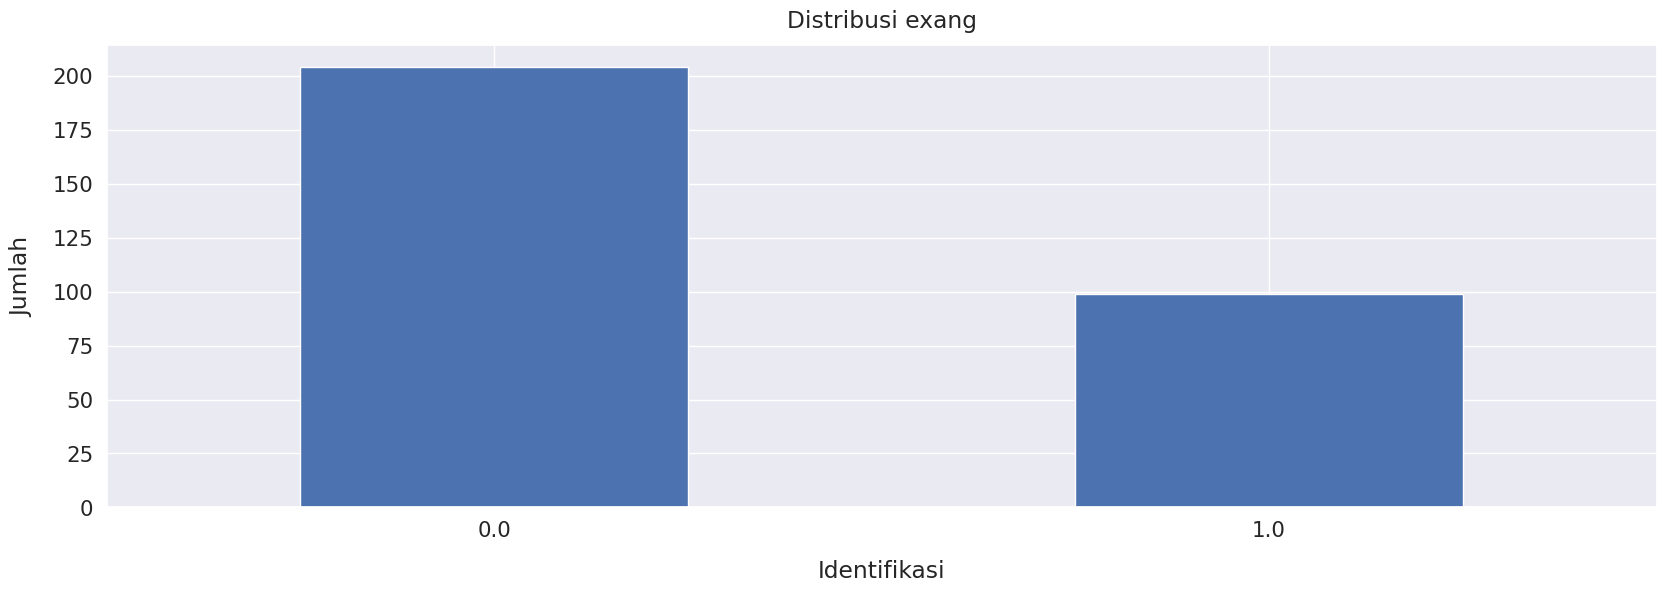

In [32]:
sns.set(font_scale=1.4)
dataset['exang'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi exang", y=1.02);

## Cek Distribusi oldpeak

In [33]:
print(dataset['oldpeak'].value_counts())

0.0    99
1.2    17
0.6    14
1.0    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
1.5     5
3.6     4
2.2     4
3.4     3
0.9     3
2.4     3
0.3     3
4.0     3
1.1     2
4.2     2
2.3     2
2.5     2
3.2     2
5.6     1
2.9     1
6.2     1
2.1     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: oldpeak, dtype: int64


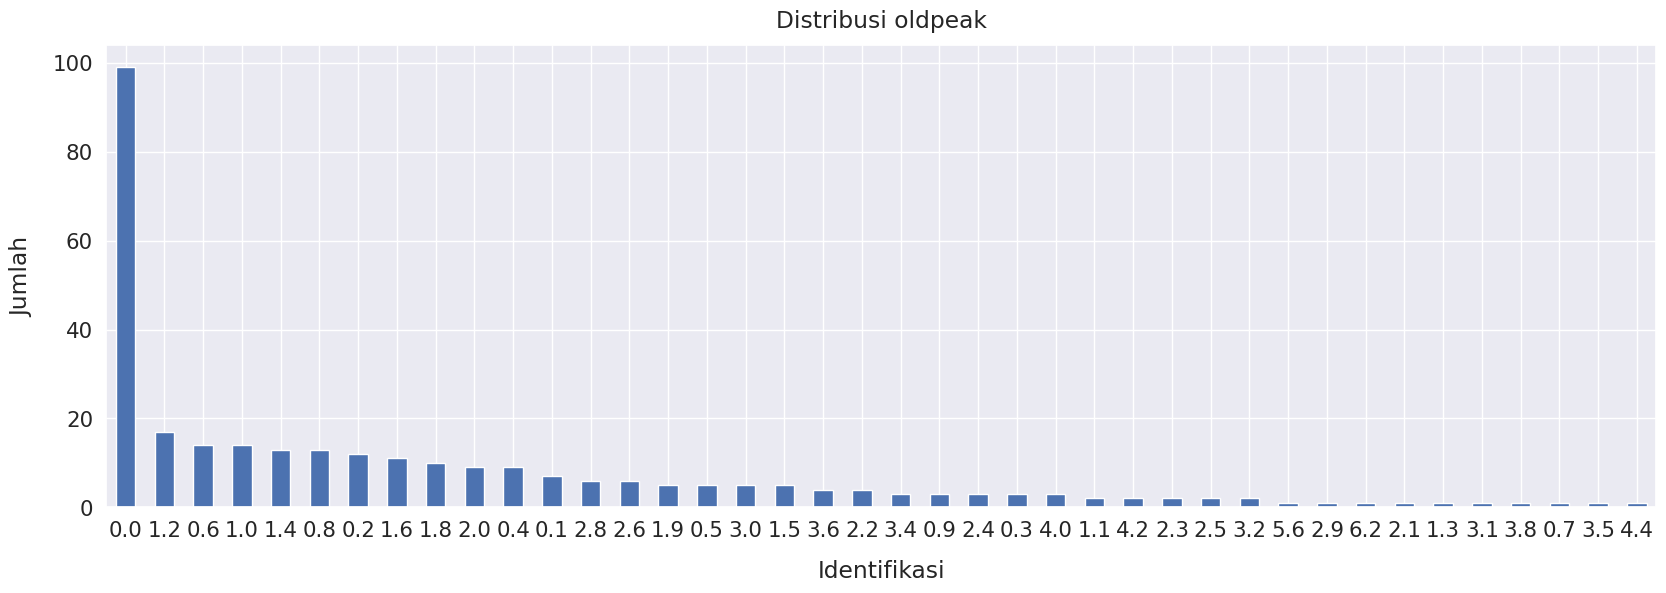

In [34]:
sns.set(font_scale=1.4)
dataset['oldpeak'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi oldpeak", y=1.02);

## Cek Distribusi slope

In [35]:
print(dataset['slope'].value_counts())

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64


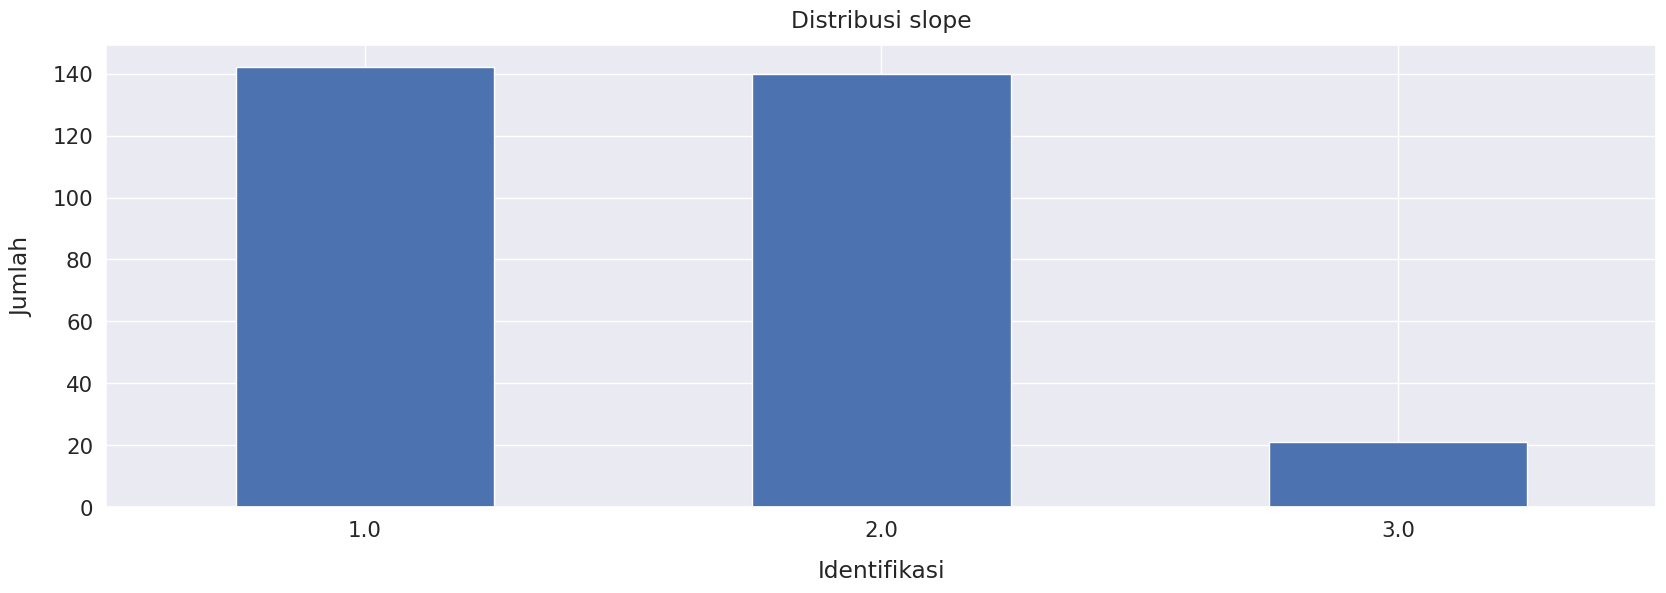

In [36]:
sns.set(font_scale=1.4)
dataset['slope'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi slope", y=1.02);

## Cek Distribusi ca

In [37]:
print(dataset['ca'].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64


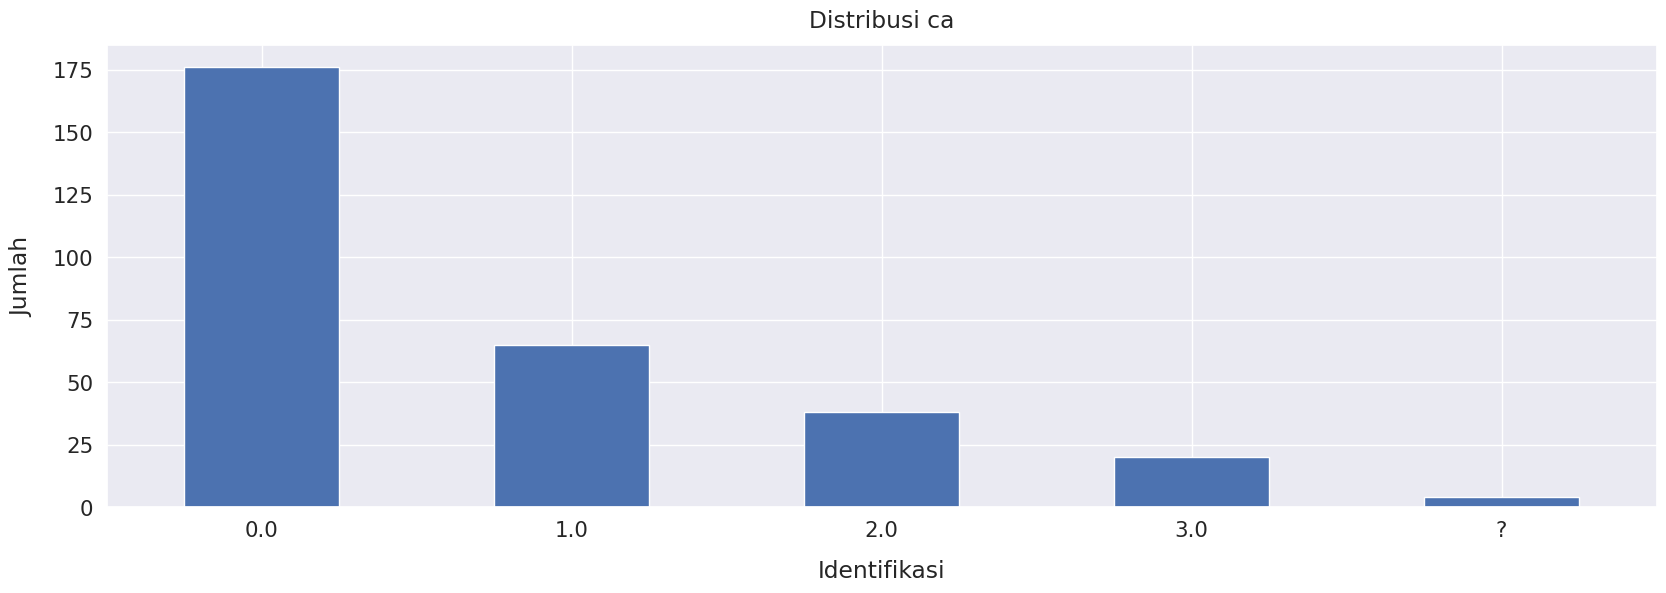

In [38]:
sns.set(font_scale=1.4)
dataset['ca'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi ca", y=1.02);

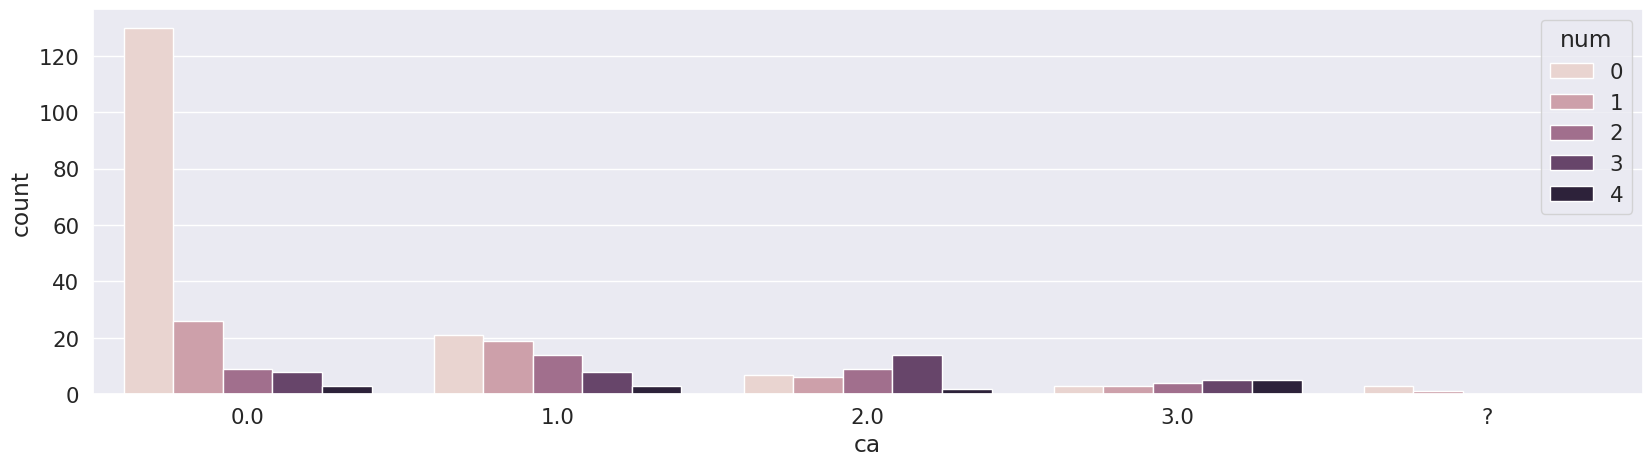

In [39]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['ca'],order=dataset['ca'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi thal

In [40]:
print(dataset['thal'].value_counts())

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


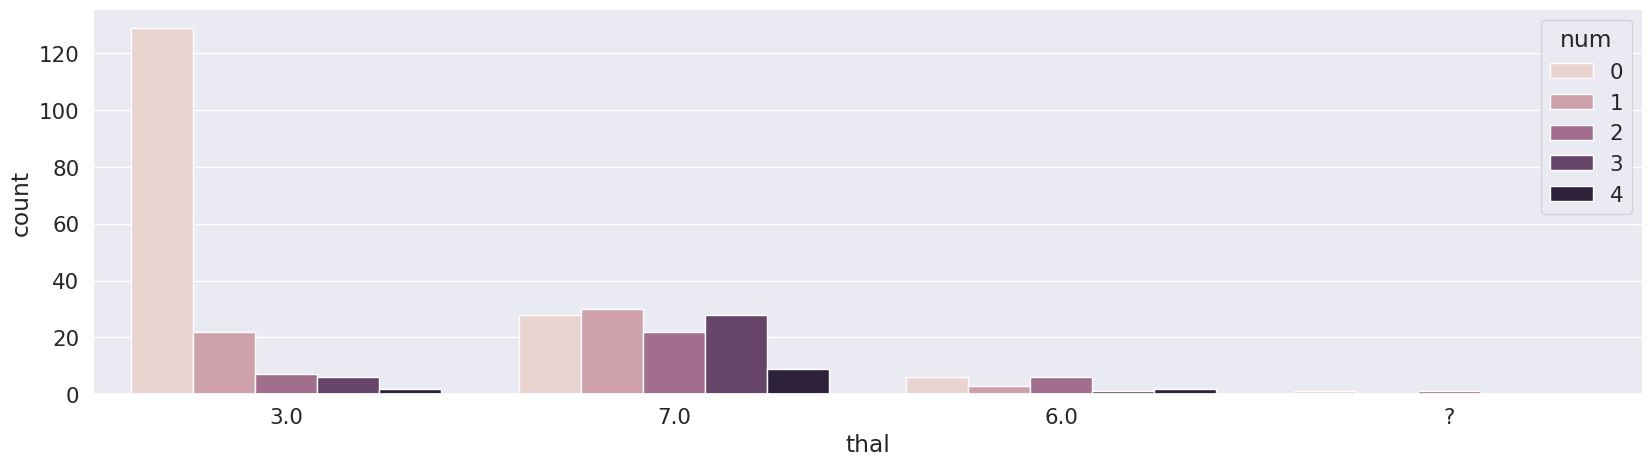

In [41]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['thal'],order=dataset['thal'].value_counts().index,hue=dataset['num'])
plt.show()

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`balanced`**, disini asesi **tidak melakukan proses perbaikan balanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data

**temuan**:

|Nama             | Deskripsi|
|-----------------|---------|
| **num**       | **Label**   |
| age             | Atribut |
| sex             | Atribut |
| cp             | Atribut |
| trestbps - thal       | Atribut |


## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [42]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [43]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [44]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [45]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


### tahap memperbaiki nilai yang hilang


In [46]:
dataset.isnull().values.any()

True

In [47]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['ca', 'thal'], dtype='object')

In [48]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

ca      1.320132
thal    0.660066
dtype: float64

**temuan**:

<Axes: >

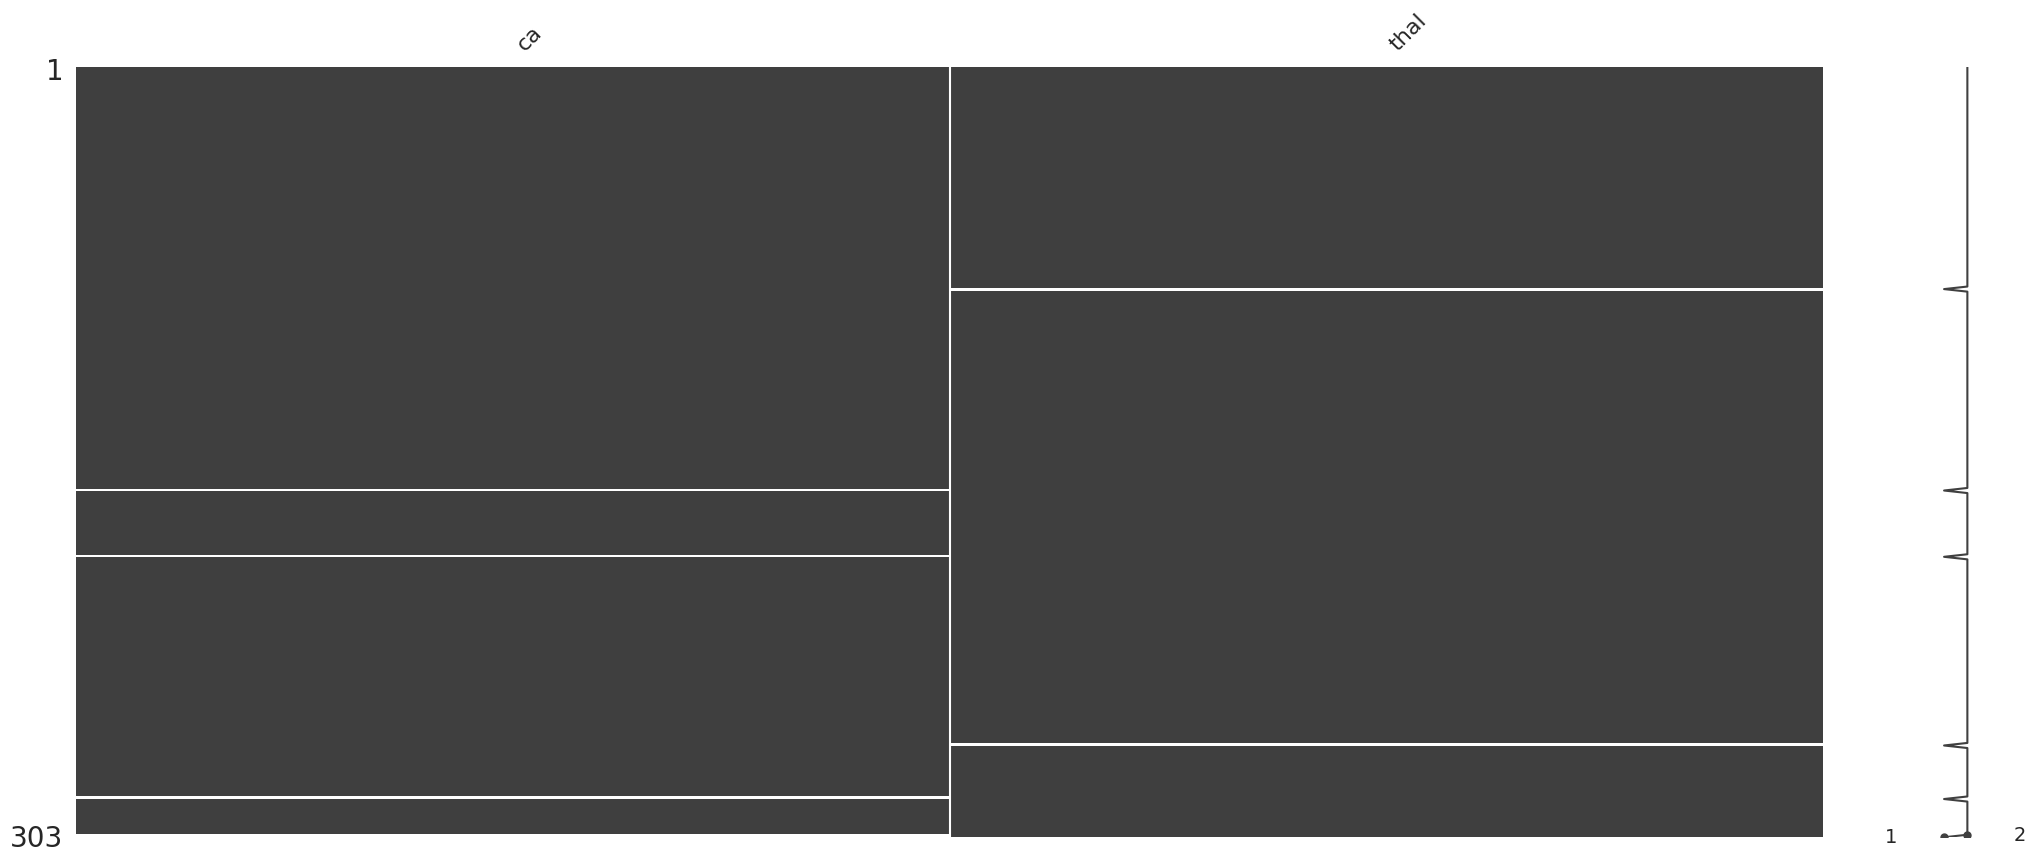

In [49]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

**drop feature**

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

Median robust terhadap outliers

In [50]:
# Perbaiki kolom ca & thal
median_value=dataset['ca'].median()
dataset['ca']=dataset['ca'].fillna(median_value)

median_value=dataset['thal'].median()
dataset['thal']=dataset['thal'].fillna(median_value)

Kalau hilang berupa data huruf bisa pakai mode, untuk data numerik bisa menggunakan median

cek kembali

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [52]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**temuan**: meski sudah diperbaiki, namun tipe data masih Object, maka perlu dirubah menjadi int atau Float. untuk menentukan tersebut, perlu dilihat kembali distribusi data

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

**silakan pakai sesuai kebutuhan**

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [54]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Mengubah tipe data

In [55]:
dataset['ca'] = dataset['ca'].astype(str).astype(float)
dataset['thal'] = dataset['thal'].astype(str).astype(float)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [57]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### menghapus nilai yang bernilai konstan

In [58]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [60]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### cek Korelasi

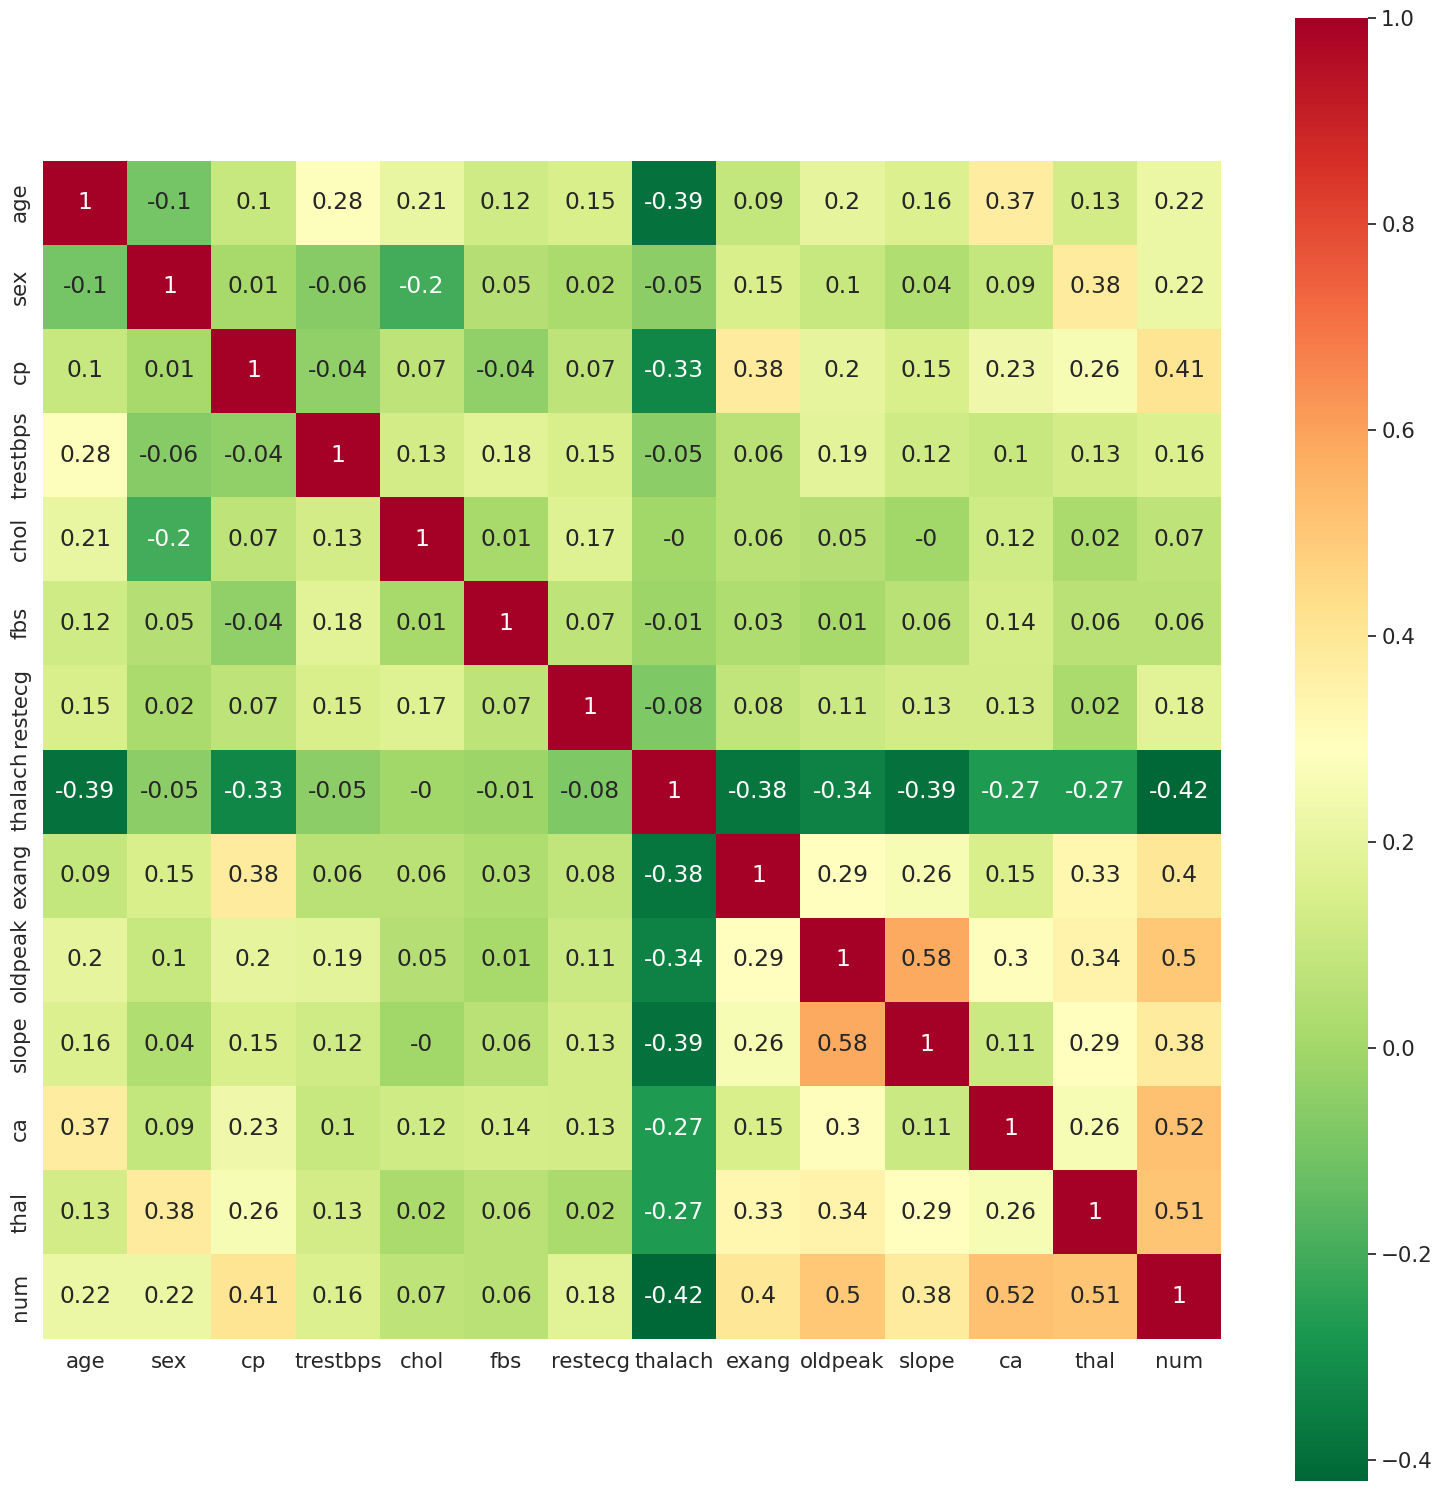

In [70]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

Jika 0,8/0,9 keatas harus dihapus, karena sangat berpengaruh sekali.

### Hapus Fitur Berkorelasi 1

A5 dan A4 korelasinya satu, maka salah satu harus di hapus

In [ ]:
dataset.drop(['A5'], axis="columns", inplace=True)

### cek boxplot

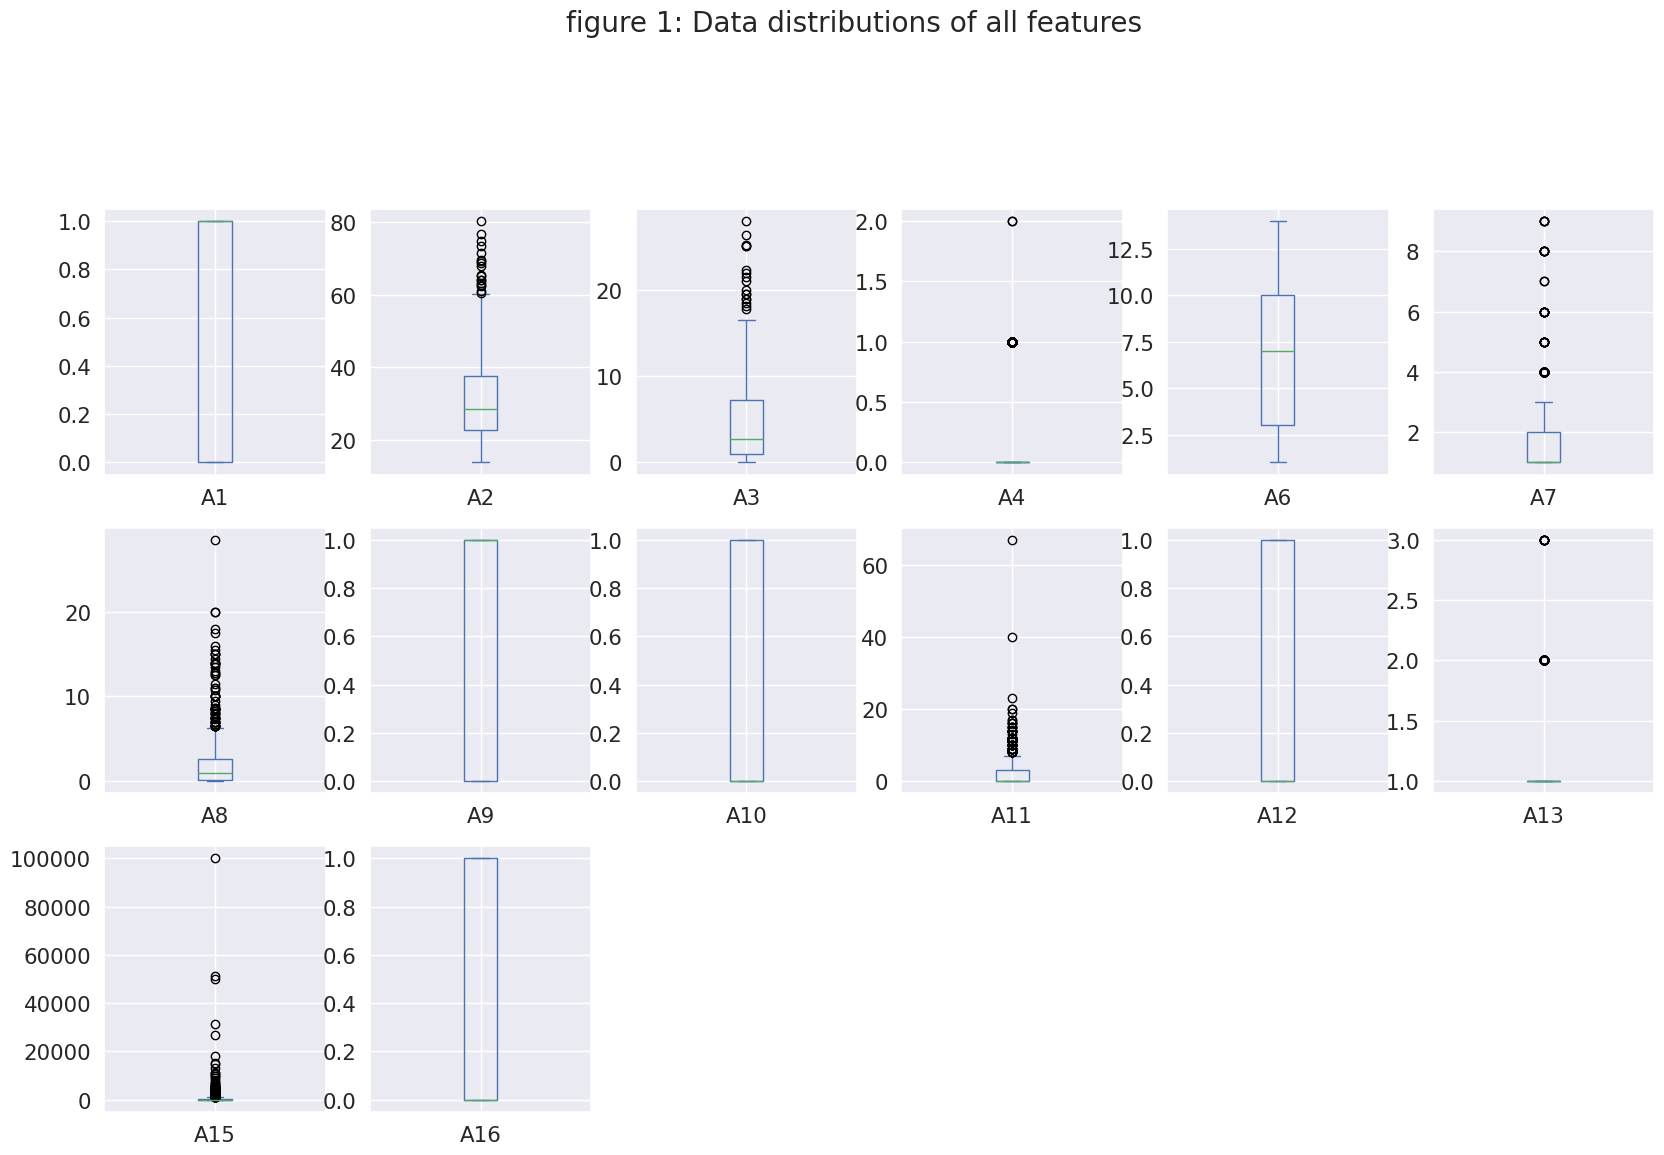

In [ ]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

In [71]:
dataset['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Imbalance karena 0 lebih banyak dan tidak rata dibandingkan label lain

In [72]:
y = dataset['num']

In [73]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [74]:
X = dataset.drop(['num'], 1)

<ipython-input-74-4806939888b3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['num'], 1)


In [75]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Perlakukan data original

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal

In [77]:
X_norm = StandardScaler().fit_transform(X)

In [78]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=ukuran_test, random_state=42)

### Perlakuan data original PCA

In [79]:
pca = PCA(random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of features:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:           0          1          2          3         4         5         6   \
0 -12.665422   2.816279  14.992618   6.795984 -1.078475  0.682857  0.173881   
1  41.303628  45.289369  21.823962   0.083864  2.739570  0.989639 -0.770195   
2 -17.676068  21.578740 -11.567503  11.126278 -2.462890  1.279392 -0.621257   
3   2.400054 -39.913487   0.825560 -10.702652 -0.059102  2.973355  2.149224   
4 -43.291675 -23.860984   1.860055  -7.886838  1.204136  1.211934 -0.565039   

         7         8         9         10        11        12  
0  2.867288 -0.174296  0.733162 -0.286089 -0.324111  0.628685  
1 -1.185863  1.360030  0.080962 -0.751188 -0.060823 -0.485932  
2 -0.100121  0.123092 -0.217923 -0.196525  0.289632 -0.192335  
3  0.110518 -0.621591  0.560694 -0.350934 -0.616951 -0.161037  
4  0.991922  0.165271 -0.447878  0.749352  0.499795  0.078749  
Explained variance ratio: [7.46500715e-01 1.50077697e-01 8.51123741e-02 1.61233450e-02
 1.02191774e-03 3.31412482e-04 2.53

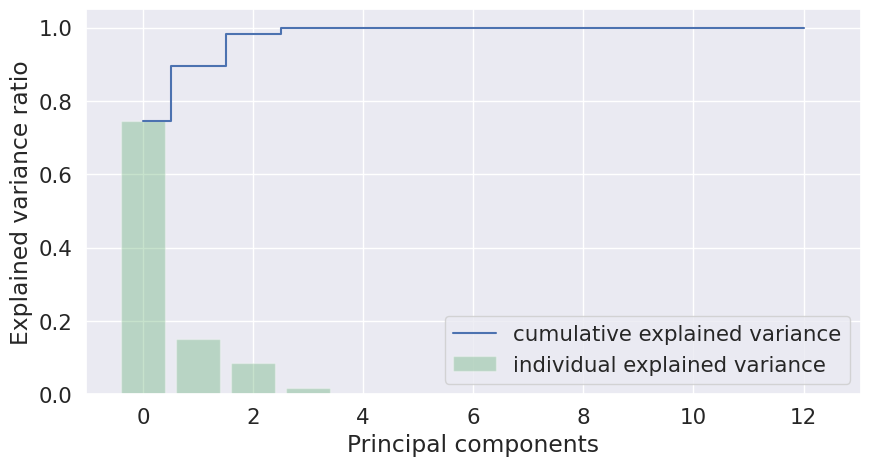

Cumulative explained ratio: [0.74650071 0.89657841 0.98169079 0.99781413 0.99883605 0.99916746
 0.99942065 0.99964371 0.99981931 0.99987862 0.99992752 0.99996796
 1.        ]


In [80]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

Minimal ambil PC 2/3 yg mendekati 0,9

In [81]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC0','PC1'])

In [82]:
ori_pca

,PC0,PC1
0,-12.665422,2.816279
1,41.303628,45.289369
2,-17.676068,21.578740
3,2.400054,-39.913487
4,-43.291675,-23.860984
...,...,...
298,15.874379,12.956685
299,-52.404646,13.137756
300,-115.314206,36.033775
301,-10.749050,-23.443452


PC 1 = 14 fitur yang dikompres

In [83]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,65.0,1.0,1.0,138.0,282.0,1.0,2.0,174.0,0.0,1.4,2.0,1.0,3.0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
15,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0
163,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0


In [84]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal PCA

In [85]:
pca = PCA(random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of features:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:          0         1         2         3         4         5         6   \
0  1.162722  0.929622  3.212341  2.248647 -0.117105  0.164221  0.966571   
1  3.217830  1.451021 -0.481532 -0.849814  0.138780 -0.631340  0.403677   
2  3.143604 -0.636569 -0.364301 -0.607485 -0.045832 -1.003931  0.681505   
3 -0.464908 -1.409706  0.395323  2.797258 -0.874659 -0.160742 -0.644582   
4 -2.268663  0.388683 -0.068956  1.170135 -0.839176 -0.141872  0.729038   

         7         8         9         10        11        12  
0  0.596128 -1.484567 -0.453161 -0.222642 -0.497023  0.086506  
1 -1.058591  0.419353  1.475782  1.032829  0.942472  1.078691  
2 -0.185650  0.057853  0.470704 -0.340281 -0.895176 -0.230836  
3  2.159004  0.877933  0.243848  1.545183 -0.170085  0.508931  
4 -0.033008  1.067675  0.553453 -0.912098  0.281023 -1.100292  
Explained variance ratio: [0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.035260

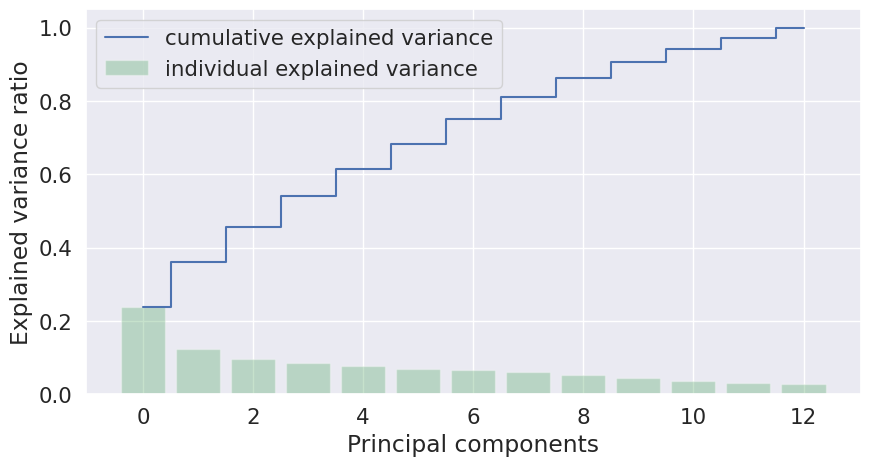

Cumulative explained ratio: [0.23687279 0.35994417 0.45525771 0.53959809 0.61542842 0.68335886
 0.74987574 0.80971274 0.86259744 0.90594572 0.94120605 0.97278203
 1.        ]


In [86]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

kita mengambil 0.86, karena menyimpan 80% informasi dari data yg mendekati 0,9

In [87]:
pca = PCA(n_components=9, random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])


In [88]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=ukuran_test, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [89]:
parameters_dt = {
                "model__max_depth": np.arange(1,10), #parameter deffault 10
                "model__min_samples_leaf": np.arange(1,10,2),
                "model__min_samples_split": np.arange(2,10),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [90]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [91]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [92]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [93]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=7, random_state=42))])

### Parameter Optimal

In [94]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 7
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data original PCA

In [95]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [96]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [97]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [98]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [99]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [100]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [101]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=7, random_state=42))])

In [102]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 7
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal PCA

In [103]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [104]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [105]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=9,
                                        random_state=42))])

In [106]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 2
model__min_samples_leaf: 9
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [107]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6462264150943396
Precision pada training set:  0.6462264150943396
Recall pada training set:  0.6462264150943396
Akurasi pada test set:  0.5274725274725275
Precision pada test set:  0.5274725274725275
Recall pada test set:  0.5274725274725275



*   Akurasi,presisi,recall = sama, maka preprocessing kita sudah benar
*   Misal naik turun/beda, ada yang keliru sama preprocessing kita

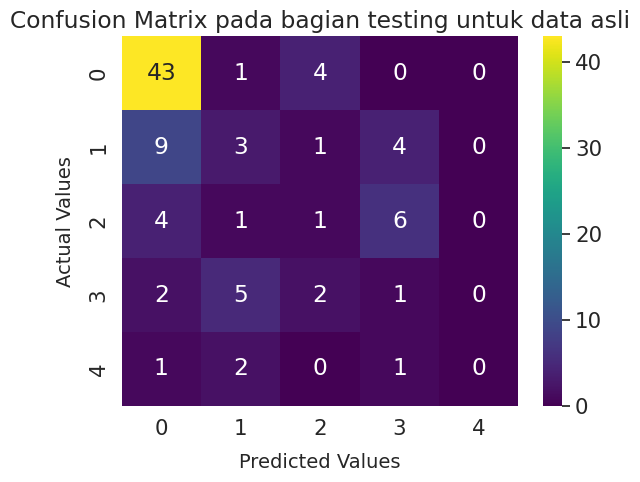

In [108]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data original PCA

In [109]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.5471698113207547
Precision pada training set:  0.5471698113207547
Recall pada training set:  0.5471698113207547
Akurasi pada test set:  0.5274725274725275
Precision pada test set:  0.5274725274725275
Recall pada test set:  0.5274725274725275


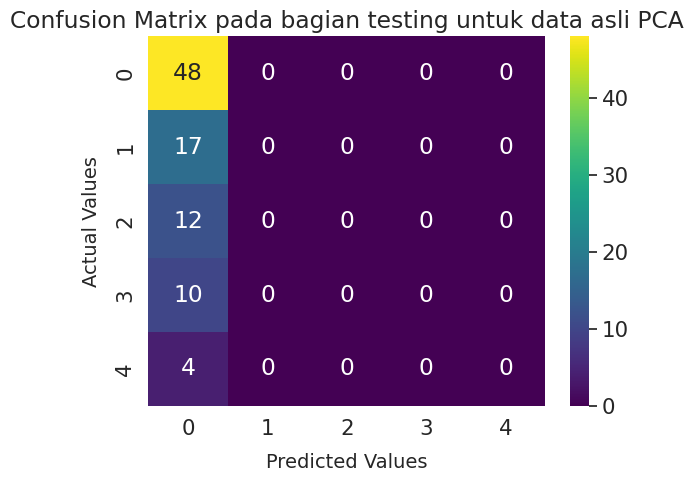

In [110]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli PCA')
plt.show()

### Evaluasi data normal

In [111]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.6462264150943396
Precision pada training set:  0.6462264150943396
Recall pada training set:  0.6462264150943396
Akurasi pada test set:  0.5274725274725275
Precision pada test set:  0.5274725274725275
Recall pada test set:  0.5274725274725275


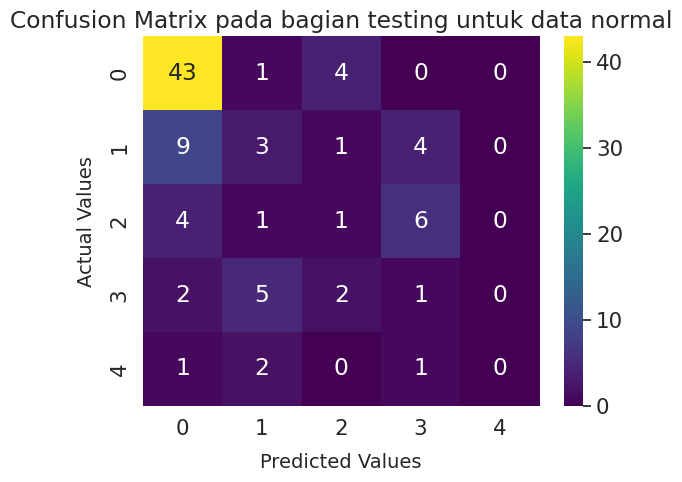

In [112]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal')
plt.show()

### Evaluasi data normal PCA

In [113]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.6367924528301887
Precision pada training set:  0.6367924528301887
Recall pada training set:  0.6367924528301887
Akurasi pada test set:  0.5934065934065934
Precision pada test set:  0.5934065934065934
Recall pada test set:  0.5934065934065934


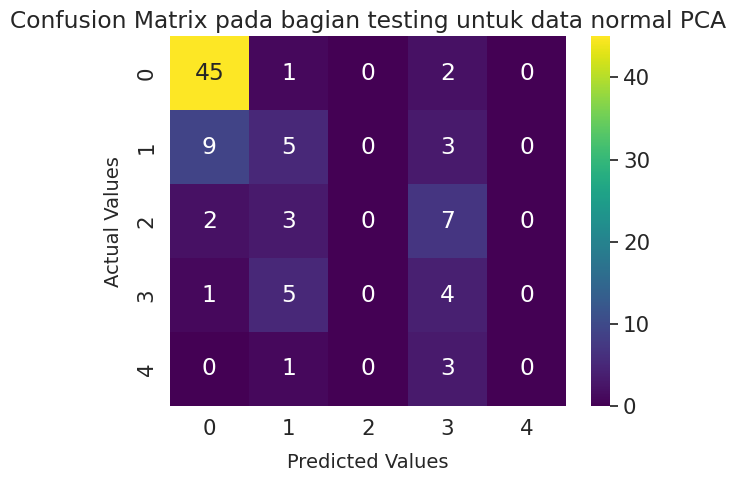

In [114]:
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal PCA')
plt.show()

In [115]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [116]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.646226,0.527473
1,Machine Learning Data Normalisasi,0.646226,0.527473
2,Machine Learning PCA Data Original,0.547170,0.527473
3,Machine Learning PCA Data Normalisasi,0.636792,0.593407


Data ori dan Normalisasi kok sama? karena decision tree punya kelebihan, ketika diproses ori atau normalisasi hasilnya sama

In [117]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

### Data Testing

In [118]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.527473,0.527473,0.527473
1,Machine Learning Data Normalisasi,0.527473,0.527473,0.527473
2,Machine Learning PCA Data Original,0.527473,0.527473,0.527473
3,Machine Learning PCA Data Normalisasi,0.593407,0.593407,0.593407


<ipython-input-119-2f10045df05b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
<ipython-input-119-2f10045df05b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


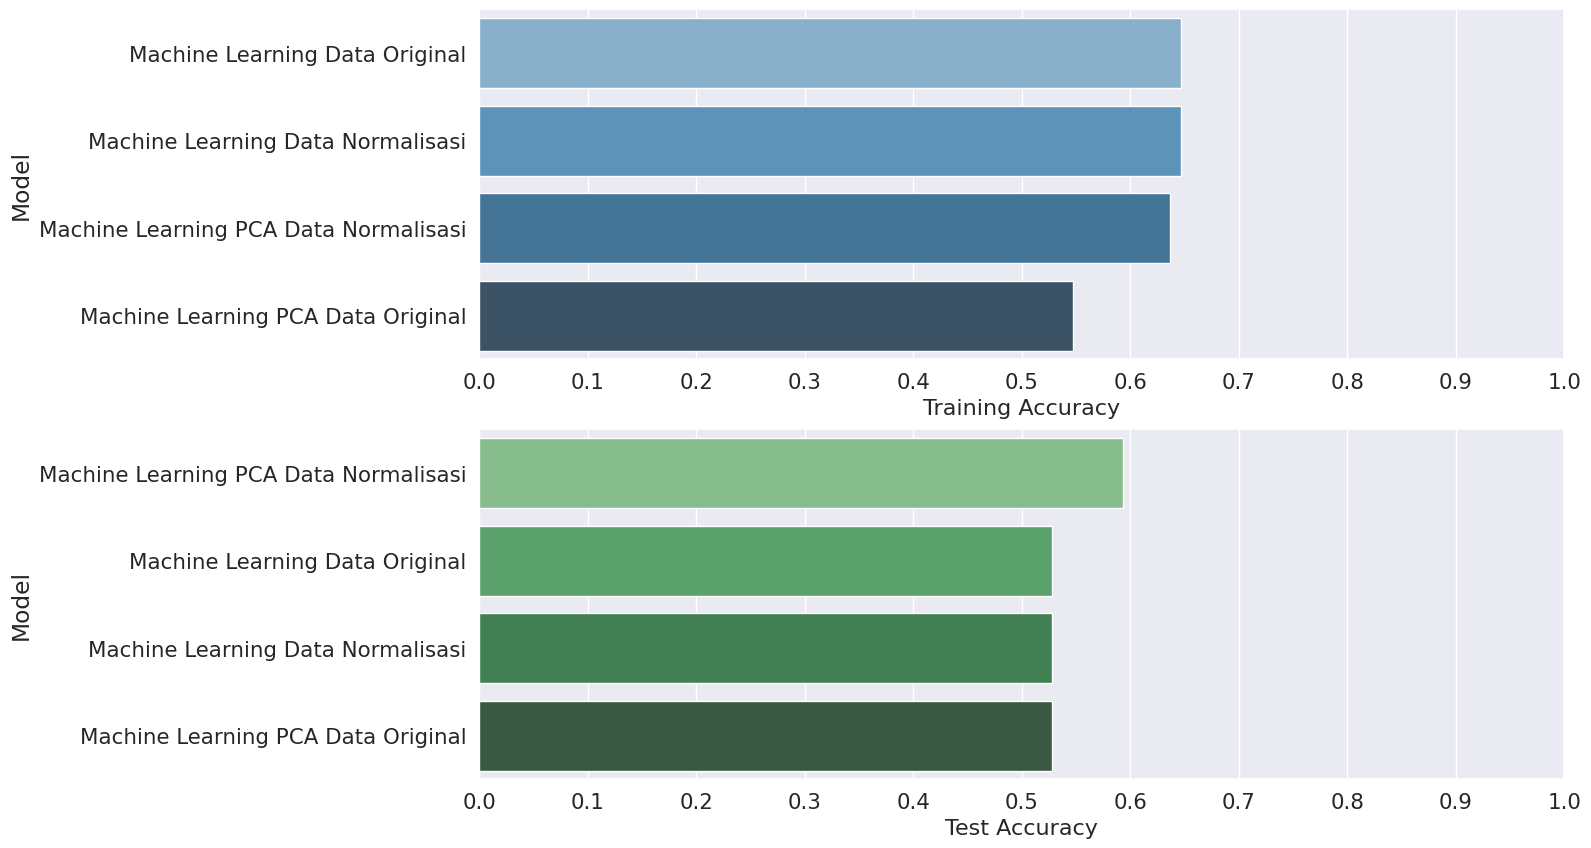

In [119]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [120]:
from sklearn import tree

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [121]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

        name      coef
11        ca  0.338558
12      thal  0.177215
7    thalach  0.155266
2         cp  0.138470
9    oldpeak  0.117100
3   trestbps  0.073391
0        age  0.000000
1        sex  0.000000
4       chol  0.000000
5        fbs  0.000000
6    restecg  0.000000
8      exang  0.000000
10     slope  0.000000


,name,coef
0,age,0.000000
1,sex,0.000000
2,cp,0.138470
3,trestbps,0.073391
4,chol,0.000000
5,fbs,0.000000
6,restecg,0.000000
7,thalach,0.155266
8,exang,0.000000
9,oldpeak,0.117100


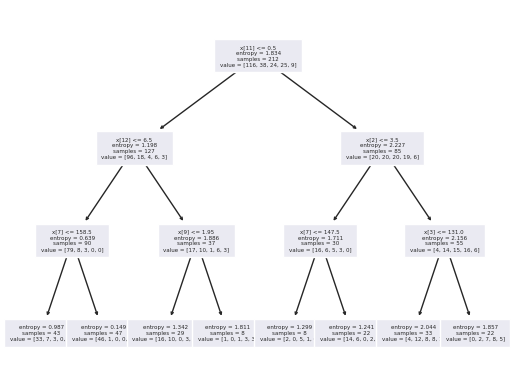

In [122]:
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],fontsize=4)
plt.show()

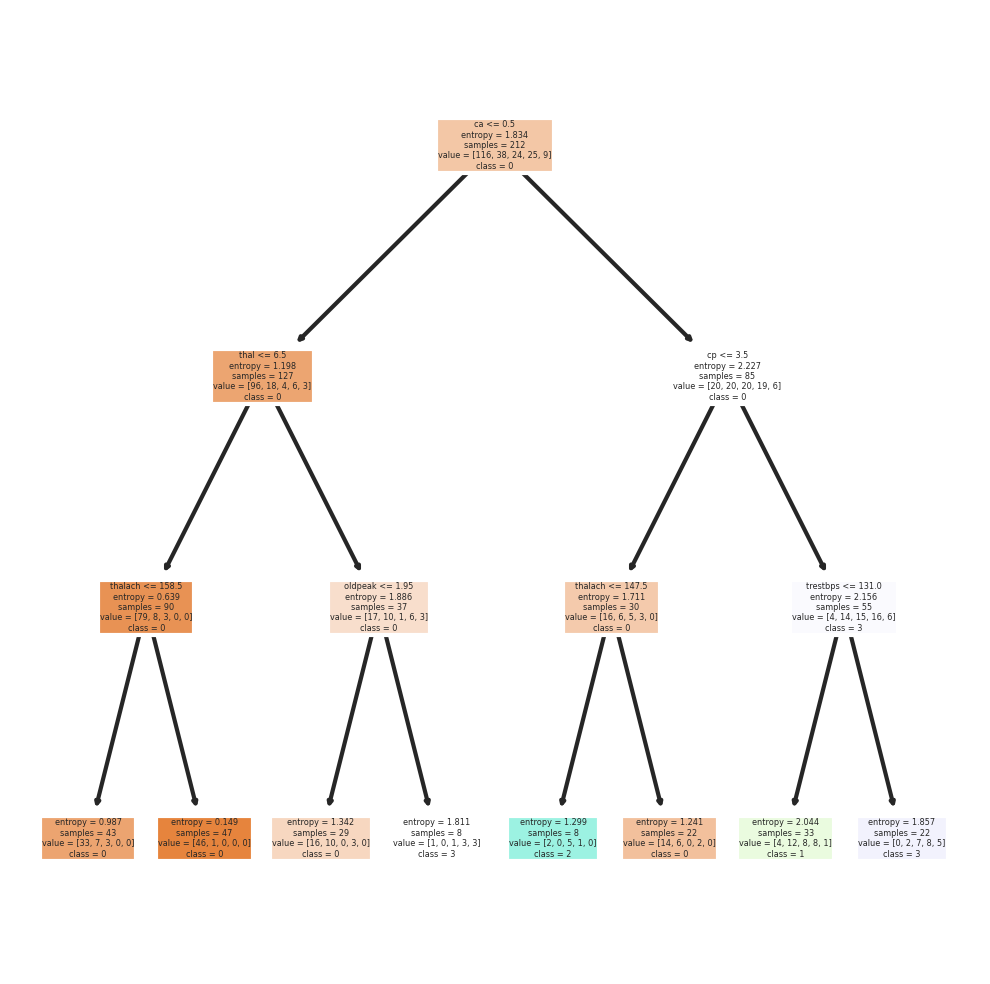

In [123]:
fn=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan. atau Jika True maka ke kiri

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data PCA Normalisasi)

In [124]:
Analize_Feature(norm_pca_classifier_dt,X_test_norm_pca)

  name      coef
0  PC0  0.919455
7  PC7  0.080545
1  PC1  0.000000
2  PC2  0.000000
3  PC3  0.000000
4  PC4  0.000000
5  PC5  0.000000
6  PC6  0.000000
8  PC8  0.000000


,name,coef
0,PC0,0.919455
1,PC1,0.000000
2,PC2,0.000000
3,PC3,0.000000
4,PC4,0.000000
5,PC5,0.000000
6,PC6,0.000000
7,PC7,0.080545
8,PC8,0.000000


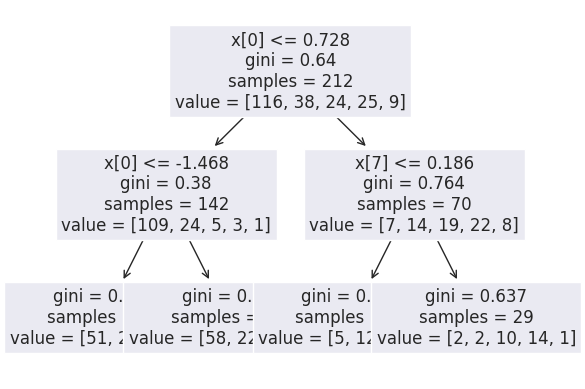

In [125]:
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"],fontsize=12)
plt.show()

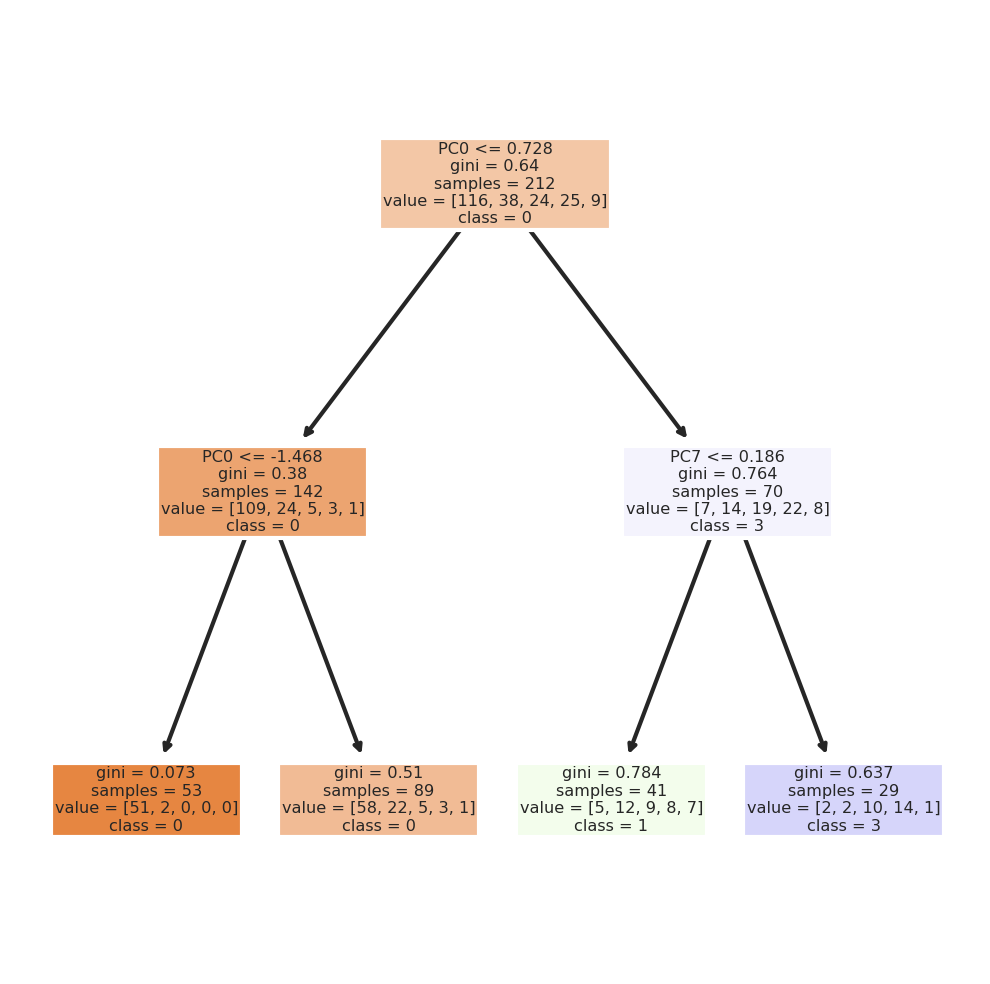

In [126]:
fn=["PC0","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"]
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')